<a href="https://colab.research.google.com/github/NadAziya/Classificateur-d-Iris/blob/main/mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas scikit-learn matplotlib


Étape 1 : Charger le jeu de données

In [1]:
import pandas as pd

# Définir les noms des colonnes
colonnes = ['longueur_sépale', 'largeur_sépale', 'longueur_pétale', 'largeur_pétale', 'espèce']

# URL du jeu de données
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

# Charger les données
data = pd.read_csv(url, header=None, names=colonnes)

# Aperçu des données
print("Aperçu du dataset Iris :")
print(data.head())


Aperçu du dataset Iris :
   longueur_sépale  largeur_sépale  longueur_pétale  largeur_pétale  \
0              5.1             3.5              1.4             0.2   
1              4.9             3.0              1.4             0.2   
2              4.7             3.2              1.3             0.2   
3              4.6             3.1              1.5             0.2   
4              5.0             3.6              1.4             0.2   

        espèce  
0  Iris-setosa  
1  Iris-setosa  
2  Iris-setosa  
3  Iris-setosa  
4  Iris-setosa  


Étape 2 : Préparation des données
 Divisez les données en caractéristiques ( features ) et cible ( target ), et effectuez une séparation pour l'entraînement et le test.


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Caractéristiques (X) et cible (y)
X = data.drop("espèce", axis=1)  # Retirer la colonne 'espèce'
y = data["espèce"]

# Encodage des étiquettes (transformer les noms d'espèces en nombres)
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Données prêtes pour l'entraînement.")


Données prêtes pour l'entraînement.


Étape 3 : Entraîner un modèle simple
Voici un exemple utilisant un Random Forest pour classer les espèces de fleurs.

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialiser le modèle
model = RandomForestClassifier(random_state=42)

# Entraîner le modèle
model.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer les performances
print("Accuracy :", accuracy_score(y_test, y_pred))
print("\nRapport de classification :\n", classification_report(y_test, y_pred))


Accuracy : 1.0

Rapport de classification :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Étape 4 : Visualisation (Facultatif)
Vous pouvez visualiser les performances du modèle avec une matrice de confusion.

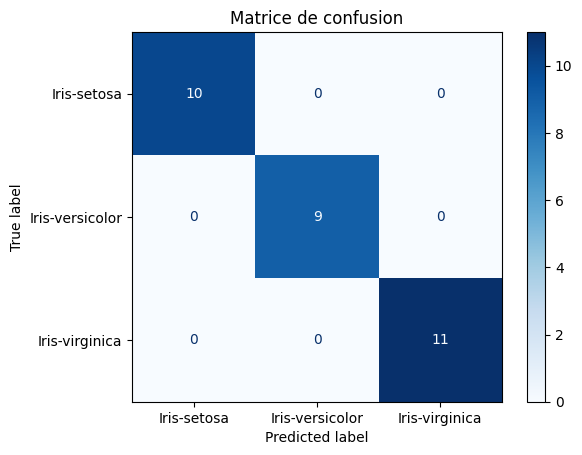

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de confusion")
plt.show()
